# Task 2: Credit Card Fraud Detection
    We are tasked to build a model to detect fraudulent credit card transactions. Using a
    dataset containing information about credit card transactions, and We are going to
    experiment with algorithms like Logistic Regression, Decision Trees,
    or Random Forests to classify transactions as fraudulent or
    legitimate. 

In [1]:
## Import Necessary libraries

import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


from imblearn.under_sampling import RandomUnderSampler

# Steps
## 1. Data Collection
## 2. Preparing the Data
## 3. Data Preprocessing
## 4. Model selection
## 5. Model Testing

# Data Collection
   We are going the import the csv files which contain the necessary fraud data you can download it from kaggle .    https://www.kaggle.com/datasets/kartik2112/fraud-detection
   
   ### About the Dataset
     This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.
   

In [2]:
## Read the data

train_df = pd.read_csv("./Credit Card Dataset/fraudTrain.csv")
test_df = pd.read_csv("./Credit Card Dataset/fraudTest.csv")

In [3]:
## View the train data
train_df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Preparing the Data
- Remove any missing columns or rows
- Check for duplicates and remove them
- Remmove unnecessary columns and rows

## Check basic Info

In [4]:
## First do a basic analysis
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
## Check Basic statical 
train_df.describe( include = "all")


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1296675,1.296675e+06,1296675,1296675,1.296675e+06,1296675,1296675,1296675,1296675,...,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
unique,NaN,1274791,NaN,693,14,NaN,352,481,2,983,...,NaN,NaN,NaN,494,968,1296675,NaN,NaN,NaN,NaN
top,NaN,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,0069 Robin Brooks Apt. 695,...,NaN,NaN,NaN,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,4403,131659,NaN,26669,28794,709863,3123,...,NaN,NaN,NaN,9779,5636,1,NaN,NaN,NaN,NaN
mean,6.483370e+05,NaN,4.171920e+17,NaN,NaN,7.035104e+01,NaN,NaN,NaN,NaN,...,3.853762e+01,-9.022634e+01,8.882444e+04,NaN,NaN,NaN,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,NaN,1.308806e+18,NaN,NaN,1.603160e+02,NaN,NaN,NaN,NaN,...,5.075808e+00,1.375908e+01,3.019564e+05,NaN,NaN,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,...,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,NaN,1.800429e+14,NaN,NaN,9.650000e+00,NaN,NaN,NaN,NaN,...,3.462050e+01,-9.679800e+01,7.430000e+02,NaN,NaN,NaN,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,NaN,3.521417e+15,NaN,NaN,4.752000e+01,NaN,NaN,NaN,NaN,...,3.935430e+01,-8.747690e+01,2.456000e+03,NaN,NaN,NaN,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,NaN,4.642255e+15,NaN,NaN,8.314000e+01,NaN,NaN,NaN,NaN,...,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00


## Remove duplicates and missing values

In [6]:
## Check for missing values
train_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
## check for test data null values
test_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
## Check for any duplicates

train_df.duplicated().sum()

0

In [9]:
## Check for duplicates in test data
test_df.duplicated().sum()

0

In [10]:
## Check a single rows of data
train_df.iloc[0,:]

Unnamed: 0                                              0
trans_date_trans_time                 2019-01-01 00:00:18
cc_num                                   2703186189652095
merchant                       fraud_Rippin, Kub and Mann
category                                         misc_net
amt                                                  4.97
first                                            Jennifer
last                                                Banks
gender                                                  F
street                                     561 Perry Cove
city                                       Moravian Falls
state                                                  NC
zip                                                 28654
lat                                               36.0788
long                                             -81.1781
city_pop                                             3495
job                             Psychologist, counselling
dob           

## Removing unnecessary features

In [11]:
## Check for unique features in data
train_df["trans_num"].nunique()

1296675

In [12]:
## Chheck for values which have unique values in them
for column_name in train_df.columns:
    unique_values = train_df[column_name].nunique()
    print(f'Unique values in column {column_name}: {unique_values}')

Unique values in column Unnamed: 0: 1296675
Unique values in column trans_date_trans_time: 1274791
Unique values in column cc_num: 983
Unique values in column merchant: 693
Unique values in column category: 14
Unique values in column amt: 52928
Unique values in column first: 352
Unique values in column last: 481
Unique values in column gender: 2
Unique values in column street: 983
Unique values in column city: 894
Unique values in column state: 51
Unique values in column zip: 970
Unique values in column lat: 968
Unique values in column long: 969
Unique values in column city_pop: 879
Unique values in column job: 494
Unique values in column dob: 968
Unique values in column trans_num: 1296675
Unique values in column unix_time: 1274823
Unique values in column merch_lat: 1247805
Unique values in column merch_long: 1275745
Unique values in column is_fraud: 2


In [13]:
## Drop unneccesary columns like unnamed:0
dropColumn =["Unnamed: 0","job" ,"cc_num","trans_num","zip" ,"unix_time","merch_lat","merch_long","dob","first","last","street","city"] 
train_df.drop(dropColumn,axis = 1,inplace = True)
test_df.drop(dropColumn,axis = 1,inplace = True)

In [14]:
## View the data after dropping unnecessary columns
train_df.head(2)

,trans_date_trans_time,merchant,category,amt,gender,state,lat,long,city_pop,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,0


In [15]:
## Create a fuction convert the trans_time_into day of week
def datetoDay(time):
    timestamp = datetime.strptime(time, "%Y-%m-%d %H:%M:%S")

    # Get the day of the week as a string
    day_of_week = timestamp.strftime("%A")
    return day_of_week

In [16]:
## Apply the conversion on each sample of test and train
train_df["trans_date_trans_time"] = train_df["trans_date_trans_time"].apply(datetoDay)
test_df["trans_date_trans_time"] = test_df["trans_date_trans_time"].apply(datetoDay)

In [17]:
train_df.head()

,trans_date_trans_time,merchant,category,amt,gender,state,lat,long,city_pop,is_fraud
0,Tuesday,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,0
1,Tuesday,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,0
2,Tuesday,fraud_Lind-Buckridge,entertainment,220.11,M,ID,42.1808,-112.2620,4154,0
3,Tuesday,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,46.2306,-112.1138,1939,0
4,Tuesday,fraud_Keeling-Crist,misc_pos,41.96,M,VA,38.4207,-79.4629,99,0


## Data Visualization

In [18]:
## Check for imbalanced data
train_df["is_fraud"].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

<Axes: xlabel='is_fraud', ylabel='count'>

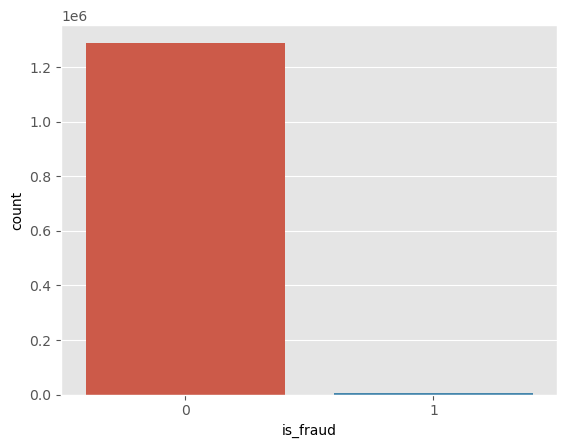

In [19]:
## Plot the unbalanced data
plt.style.use("ggplot")
sns.countplot(x= train_df["is_fraud"])

<Axes: xlabel='gender', ylabel='count'>

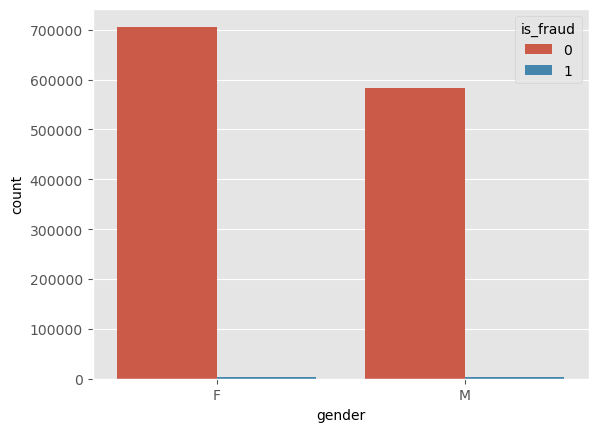

In [20]:
## Plot a count plot gender and fraud 
sns.countplot(x= train_df["gender"],hue = "is_fraud",data = train_df)

<Axes: xlabel='trans_date_trans_time', ylabel='count'>

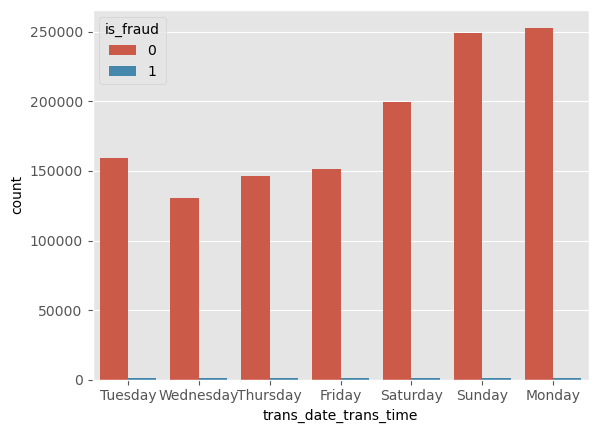

In [21]:
## Plot the day and fraud occur more
sns.countplot(x= train_df["trans_date_trans_time"],hue = "is_fraud",data = train_df)

## Data Preprocessing

### Without Handling Imbalanced Data

In [22]:
## Import necessary libraries for preprocessing 

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer 

x_train = train_df.drop("is_fraud" ,axis = 1)
y_train = train_df["is_fraud"]

x_test = test_df.drop("is_fraud" ,axis = 1)
y_test = test_df["is_fraud"]


categ = ["trans_date_trans_time","merchant","category","gender","state"]
numeric = ["amt","lat" ,"long" ,"city_pop"]



encoder = OneHotEncoder()
scaler = StandardScaler()

transf = ColumnTransformer(transformers = [("categorical",encoder ,categ),
                                            ("num",scaler,numeric)],remainder="passthrough")
x_train = transf.fit_transform(x_train)
x_test = transf.transform(x_test)

In [23]:
## Check the shape of each data

x_train.shape,x_test.shape ,y_train.shape ,y_test.shape

((1296675, 771), (555719, 771), (1296675,), (555719,))

In [24]:
## Create a testing function for model
def model_testing(estimator):
    ## Prediction on data
    y_preds = estimator.predict(x_test)
     
    ##Print accuracy score
    print("Accuracy Score : ",accuracy_score(y_test,y_preds))

    ## Print classification report
    print("\nConfussion Matrix :\n " ,confusion_matrix(y_test ,y_preds),"\n")

    ## Check confusion matrix
    print("classification_report: \n\n",classification_report(y_test ,y_preds))

## Model selection

In [25]:
## Import all the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Logistic Regression
- Apply LogisticRegression without balancing the data

In [26]:
## Logistic regression without balancing data
model = LogisticRegression()
model.fit(x_train ,y_train)
model_testing(model)

C:\Users\Barcha\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score :  0.995531914510751

Confussion Matrix :
  [[553235    339]
 [  2144      1]] 

classification_report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



### DecisionTreeClassifier
- Apply DecisionTree without balancing the datasets

In [27]:
## Logistic regression without balancing data
dt = DecisionTreeClassifier()
dt.fit(x_train ,y_train)
model_testing(dt)
dt.score(x_test ,y_test)


Accuracy Score :  0.9964154545732645

Confussion Matrix :
  [[552469   1105]
 [   887   1258]] 

classification_report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.53      0.59      0.56      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.79      0.78    555719
weighted avg       1.00      1.00      1.00    555719



0.9964154545732645

### RandomForestClassifier 

In [28]:
## Logistic regression without balancing data
rf = RandomForestClassifier()
rf.fit(x_train ,y_train)
model_testing(rf)
rf.score(x_test ,y_test)

Accuracy Score :  0.997430355989268

Confussion Matrix :
  [[553400    174]
 [  1254    891]] 

classification_report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.84      0.42      0.56      2145

    accuracy                           1.00    555719
   macro avg       0.92      0.71      0.78    555719
weighted avg       1.00      1.00      1.00    555719



0.997430355989268

### Conclusiom

    As we can see from above that the accuracy was high but the recall and and f1 score was very low this is because due to larger samples of False Value the model is showing biaseness toward a single class and count predict the low sample class correctly. To solve this issue we will
    - Balanced the samples either(underSampling or OverSampling)

# Model prediction by Balancing Samples

## UnderSampling

In [29]:
## Balance the imbalanced data apply undersampling
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler()

x_train = train_df.drop("is_fraud" ,axis = 1)
y_train = train_df["is_fraud"]

x_test = test_df.drop("is_fraud" ,axis = 1)
y_test = test_df["is_fraud"]

x_sampled ,y_sampled =sampler.fit_resample(x_train ,y_train) 

categ = ["trans_date_trans_time","merchant","category","gender","state"]
numeric = ["amt","lat" ,"long" ,"city_pop"]



encoder = OneHotEncoder()
scaler = StandardScaler()

transf = ColumnTransformer(transformers = [("categorical",encoder ,categ),
                                            ("num",scaler,numeric)],remainder="passthrough")
x_train = transf.fit_transform(x_sampled)
x_test = transf.transform(x_test)

In [30]:
## Check the shape of each data

x_train.shape,x_test.shape ,y_sampled.shape ,y_test.shape

((15012, 771), (555719, 771), (15012,), (555719,))

### Logistic Regression 
- Model Training on Undersampled Data

In [31]:
model = LogisticRegression()
model.fit(x_train ,y_sampled)
model_testing(model)

C:\Users\Barcha\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score :  0.8800400922048733

Confussion Matrix :
  [[487453  66121]
 [   543   1602]] 

classification_report: 

               precision    recall  f1-score   support

           0       1.00      0.88      0.94    553574
           1       0.02      0.75      0.05      2145

    accuracy                           0.88    555719
   macro avg       0.51      0.81      0.49    555719
weighted avg       1.00      0.88      0.93    555719



### DecisionTreeClassifier
- Model Training on Undersampled Data

In [32]:
## Logistic regression without balancing data
dt = DecisionTreeClassifier()
dt.fit(x_train ,y_sampled)
model_testing(dt)
dt.score(x_test ,y_test)

Accuracy Score :  0.9529438439211184

Confussion Matrix :
  [[527522  26052]
 [    98   2047]] 

classification_report: 

               precision    recall  f1-score   support

           0       1.00      0.95      0.98    553574
           1       0.07      0.95      0.14      2145

    accuracy                           0.95    555719
   macro avg       0.54      0.95      0.56    555719
weighted avg       1.00      0.95      0.97    555719



0.9529438439211184

### RandomForestClassifier 
- Model Training on Undersampled Data

In [33]:
## Logistic regression without balancing data
rf = RandomForestClassifier()
rf.fit(x_train ,y_sampled)
model_testing(rf)
rf.score(x_test ,y_test)

Accuracy Score :  0.9735909695367623

Confussion Matrix :
  [[539141  14433]
 [   243   1902]] 

classification_report: 

               precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.12      0.89      0.21      2145

    accuracy                           0.97    555719
   macro avg       0.56      0.93      0.60    555719
weighted avg       1.00      0.97      0.98    555719



0.9735909695367623

## OverSampling

In [34]:
## Balance the imbalanced data using Oversampling
from imblearn.over_sampling import SMOTE

Over_sampler = SMOTE()

x_train = train_df.drop("is_fraud" ,axis = 1)
y_train = train_df["is_fraud"]

x_test = test_df.drop("is_fraud" ,axis = 1)
y_test = test_df["is_fraud"]

x_sampled_O ,y_sampled_O =Over_sampler.fit_resample(x_train ,y_train) 

categ = ["trans_date_trans_time","merchant","category","gender","state"]
numeric = ["amt","lat" ,"long" ,"city_pop"]



encoder = OneHotEncoder()
scaler = StandardScaler()

transf = ColumnTransformer(transformers = [("categorical",encoder ,categ),
                                            ("num",scaler,numeric)],remainder="passthrough")
x_train = transf.fit_transform(x_sampled_O)
x_test = transf.transform(x_test)

### LogisticRegression
- Model Training on Oversampled Data

In [35]:
## Logistic regression without balancing data
model = LogisticRegression()
model.fit(x_train ,y_sampled_O)
model_testing(model)

C:\Users\Barcha\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score :  0.8865451784085122

Confussion Matrix :
  [[491074  62500]
 [   549   1596]] 

classification_report: 

               precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.02      0.74      0.05      2145

    accuracy                           0.89    555719
   macro avg       0.51      0.82      0.49    555719
weighted avg       1.00      0.89      0.94    555719



### DecisionTreeClassifier
- Model Training on Oversampled Data

In [36]:
## Logistic regression without balancing data
dt = DecisionTreeClassifier()
dt.fit(x_train ,y_sampled_O)
model_testing(dt)
dt.score(x_test ,y_test)

Accuracy Score :  0.9959313969830076

Confussion Matrix :
  [[552219   1355]
 [   906   1239]] 

classification_report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.48      0.58      0.52      2145

    accuracy                           1.00    555719
   macro avg       0.74      0.79      0.76    555719
weighted avg       1.00      1.00      1.00    555719



0.9959313969830076

### RandomForestClassifier 
- Model Training on Oversampled Data

In [37]:
## Logistic regression without balancing data
rf = RandomForestClassifier()
rf.fit(x_train ,y_sampled_O)
model_testing(rf)
rf.score(x_test ,y_test)

Accuracy Score :  0.9974321554598637

Confussion Matrix :
  [[553277    297]
 [  1130   1015]] 

classification_report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.77      0.47      0.59      2145

    accuracy                           1.00    555719
   macro avg       0.89      0.74      0.79    555719
weighted avg       1.00      1.00      1.00    555719



0.9974321554598637